In [70]:
import networkx as nx

import matplotlib.pyplot as plt
import pandas as pd

In [71]:
def read_top_instance(file_path):
    with open(file_path, 'r') as file:
        # Read the first three lines
        n_line = file.readline().strip()
        m_line = file.readline().strip()
        tmax_line = file.readline().strip()

        # Parse n N
        _, N = n_line.split()
        N = int(N)

        # Parse m P
        _, P = m_line.split()
        P = int(P)

        # Parse tmax Tmax
        _, Tmax = tmax_line.split()
        Tmax = float(Tmax)

        # Read the remaining lines for each node
        nodes = []
        for i in range(N):
            line = file.readline().strip()
            if line == '':
                continue  # Skip empty lines
            x_str, y_str, s_str = line.split()
            x = float(x_str)
            y = float(y_str)
            s = float(s_str)
            nodes.append({'id': i, 'x': x, 'y': y, 'score': s})

        return N, P, Tmax, nodes

Number of nodes: 100
Number of teams (vehicles): 4
Maximum time/distance: 60.0


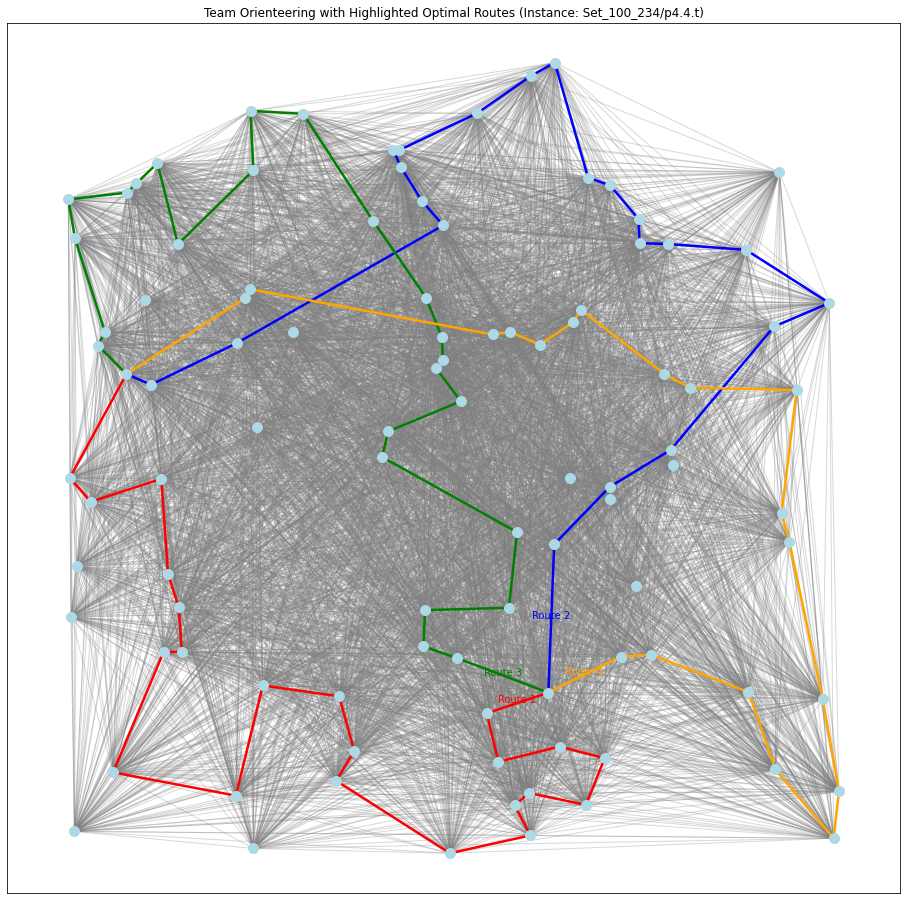

In [72]:

file_path = 'Set_100_234/p4.4.t.txt'
N, P, Tmax, nodes = read_top_instance(file_path)


# Print summary
print(f"Number of nodes: {N}")
print(f"Number of teams (vehicles): {P}")
print(f"Maximum time/distance: {Tmax}")


optimal_solution =  [[0, 23, 47, 96, 66, 41, 50, 3, 86, 92, 18, 94, 87, 84, 63, 70, 21, 60, 98, 6, 76, 49, 89, 99], 
                     [0, 9, 29, 42, 95, 83, 93, 37, 61, 91, 25, 46, 5, 13, 1, 90, 15, 75, 12, 71, 55, 82, 99], 
                     [0, 7, 43, 34, 14, 67, 52, 85, 10, 69, 80, 22, 88, 17, 2, 65, 48, 45, 19, 31, 8, 68, 36, 78, 24, 99],
                      [0, 30, 73, 16, 64, 40, 58, 54, 72, 77, 27, 51, 59, 28, 38, 20, 26, 32, 39, 62, 99]]


G = nx.Graph()


for node_info in nodes:
    node_id = node_info['id']
    x = node_info['x']
    y = node_info['y']
    score = node_info['score']
    
    # Add to the graph with attributes
    G.add_node(node_id, x=x, y=y, score=score)

for i in range(N):
    for j in range(i + 1, N):
        # Could compute Euclidean distance, or read from file if provided
        dist = ((nodes[i]['x'] - nodes[j]['x'])**2 
                + (nodes[i]['y'] - nodes[j]['y'])**2) ** 0.5
        G.add_edge(i, j, weight=dist)

pos = {}
for node_info in nodes:
    pos[node_info['id']] = (node_info['x'], node_info['y'])

plt.figure(figsize=(16, 16))

# Draw edges faintly
nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.3)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=100)

# Label each node with its ID and/or score
labels = {}
for node_info in nodes:
    node_id = node_info['id']
    s = node_info['score']
    labels[node_id] = f"{node_id}\n({s})"

# Now, if you have routes for 5 teams, draw them in different colors, etc.

# -----------------------------
# 4. Plot the Graph
# -----------------------------
colors = ["red", "blue", "green", "orange", "purple"]
for idx, route in enumerate(optimal_solution):
    color = colors[idx % len(colors)]
    # Build a list of edges from the route: pairwise (0->7), (7->99), etc.
    route_edges = list(zip(route, route[1:]))

    # Draw these edges in a standout color + thicker width
    nx.draw_networkx_edges(
        G, pos,
        edgelist=route_edges,
        edge_color=color,
        width=2.5
    )

    # (Optional) Label which route # this is, near the midpoint
    # We'll just place text near the midpoint of the first edge
    if len(route_edges) > 0:
        first_edge = route_edges[0]
        x_mid = (pos[first_edge[0]][0] + pos[first_edge[1]][0]) / 2
        y_mid = (pos[first_edge[0]][1] + pos[first_edge[1]][1]) / 2
        plt.text(
            x_mid, y_mid,
            f"Route {idx+1}",
            fontsize=10,
            color=color,
            horizontalalignment='center'
        )

plt.title("Team Orienteering with Highlighted Optimal Routes (Instance: Set_100_234/p4.4.t)")
plt.axis("equal")
plt.show()


VISUALIZATION OF RESULTS

In [73]:
df = pd.read_csv("results_base_model.csv", header=1) 

df.columns = [
    "Instance",
    "Gurobi_RunTime",
    "Gurobi_Gap",
    "Gurobi_TotalCollectedPrize",
    "Gurobi_AveragePrizePerVehicle",
    "HALNS_RunTime",
    "HALNS_TotalCollectedPrize",
    "HALNS_AveragePrizePerVehicle",
    "BKS_TotalCollectedPrize",
]

# Calculate the gap for HALNS
df["HALNS_Gap"] = ((df["BKS_TotalCollectedPrize"] - df["HALNS_TotalCollectedPrize"]) / df["BKS_TotalCollectedPrize"]) * 100

# Calculate the gap for Gurobi
df["Gurobi_Gap"] = ((df["BKS_TotalCollectedPrize"] - df["Gurobi_TotalCollectedPrize"]) / df["BKS_TotalCollectedPrize"]) * 100


df.head()

,Instance,Gurobi_RunTime,Gurobi_Gap,Gurobi_TotalCollectedPrize,Gurobi_AveragePrizePerVehicle,HALNS_RunTime,HALNS_TotalCollectedPrize,HALNS_AveragePrizePerVehicle,BKS_TotalCollectedPrize,HALNS_Gap
0,p4.2.a,13.296970,0.000000,206,103.0,8.499343,206,103.0,206,0.000000
1,p4.2.b,25.631442,0.000000,341,170.5,96.435680,341,170.5,341,0.000000
2,p4.2.c,62.215784,0.000000,452,226.0,109.620429,441,220.5,452,2.433628
3,p4.2.d,603.629947,0.000000,531,265.5,167.460203,523,261.5,531,1.506591
4,p4.2.e,602.823124,0.809061,613,306.5,134.543925,583,291.5,618,5.663430


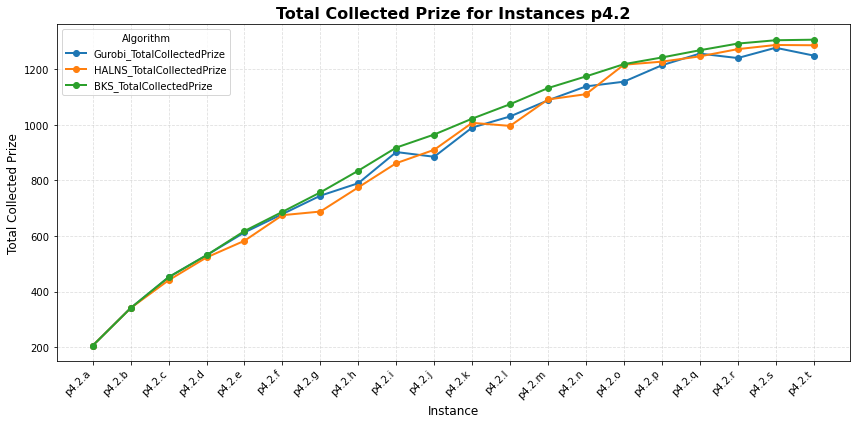

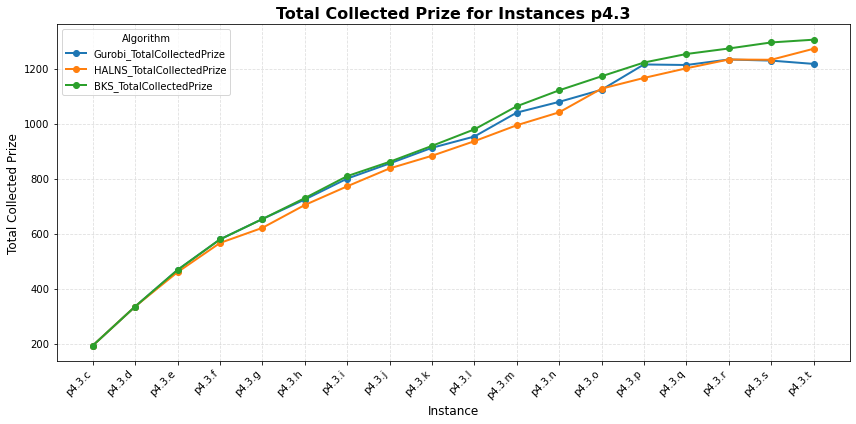

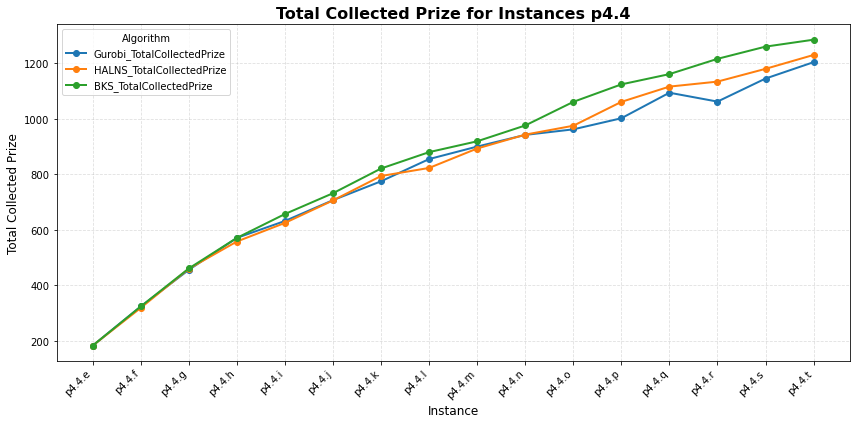

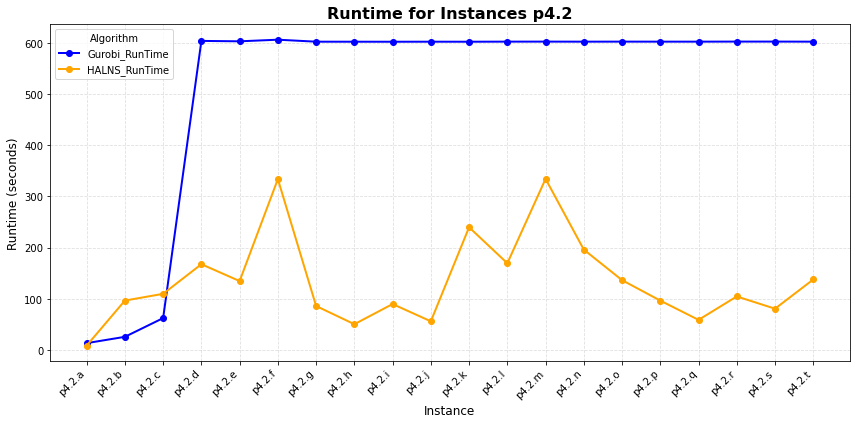

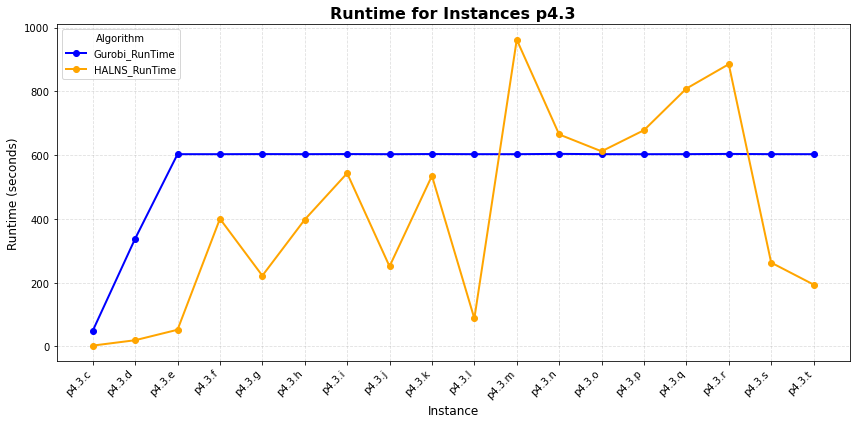

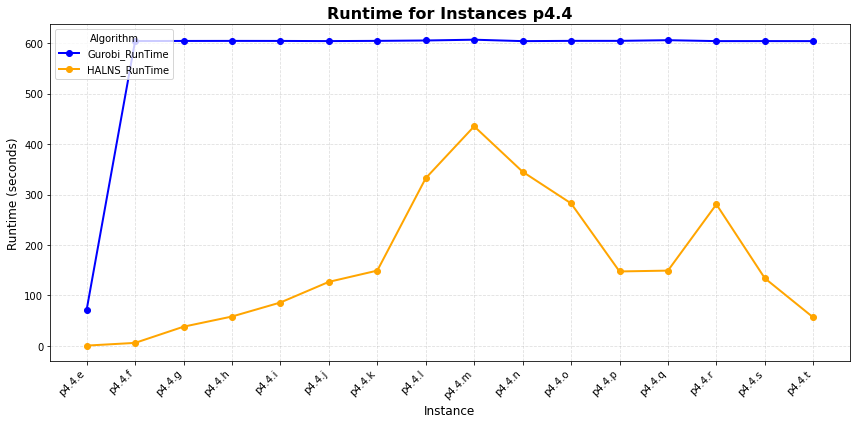

In [74]:
# Filter subsets based on instance names
df_p42 = df[df["Instance"].str.contains("p4.2")]
df_p43 = df[df["Instance"].str.contains("p4.3")]
df_p44 = df[df["Instance"].str.contains("p4.4")]

import matplotlib.pyplot as plt

def plot_total_prize(df_subset, title):
    ax = df_subset[["Gurobi_TotalCollectedPrize", "HALNS_TotalCollectedPrize", "BKS_TotalCollectedPrize"]].plot(
        figsize=(12, 6),
        marker="o",
        linestyle="-",
        linewidth=2
    )
    ax.set_title(title, fontsize=16, fontweight="bold")
    ax.set_xlabel("Instance", fontsize=12)
    ax.set_ylabel("Total Collected Prize", fontsize=12)
    ax.set_xticks(df_subset.index)
    ax.set_xticklabels(df_subset["Instance"], rotation=45, ha="right", fontsize=10)
    ax.grid(linestyle="--", alpha=0.4)
    ax.legend(title="Algorithm", loc="upper left", fontsize=10)
    plt.tight_layout()
    plt.show()

def plot_runtime(df_subset, title):
    ax = df_subset[["Gurobi_RunTime", "HALNS_RunTime"]].plot(
        figsize=(12, 6),
        marker="o",
        linestyle="-",
        linewidth=2,
        color=["blue", "orange"]
    )
    ax.set_title(title, fontsize=16, fontweight="bold")
    ax.set_xlabel("Instance", fontsize=12)
    ax.set_ylabel("Runtime (seconds)", fontsize=12)
    ax.set_xticks(df_subset.index)
    ax.set_xticklabels(df_subset["Instance"], rotation=45, ha="right", fontsize=10)
    ax.grid(linestyle="--", alpha=0.4)
    ax.legend(title="Algorithm", loc="upper left", fontsize=10)
    plt.tight_layout()
    plt.show()


# Plot Total Collected Prize
plot_total_prize(df_p42, "Total Collected Prize for Instances p4.2")
plot_total_prize(df_p43, "Total Collected Prize for Instances p4.3")
plot_total_prize(df_p44, "Total Collected Prize for Instances p4.4")

# Plot Runtime
plot_runtime(df_p42, "Runtime for Instances p4.2")
plot_runtime(df_p43, "Runtime for Instances p4.3")
plot_runtime(df_p44, "Runtime for Instances p4.4")



In [75]:
print(df["HALNS_RunTime"].mean()
)

238.8229182360185


In [76]:

# Load DTT data and rename columns
df_dtt = pd.read_csv("results-dtt.csv")
df_dtt.columns = [
    "Instance",
    "Gurobi_RunTime_DTT",
    "Gurobi_Gap_DTT",
    "Gurobi_TotalCollectedPrize_DTT",
    "Gurobi_AveragePrizePerVehicle_DTT",
]

# Merge base and DTT data on Instance
df_combined = df.merge(df_dtt, on="Instance")

df_p42 = df_combined[df_combined["Instance"].str.contains("p4.2")]
df_p43 = df_combined[df_combined["Instance"].str.contains("p4.3")]
df_p44 = df_combined[df_combined["Instance"].str.contains("p4.4")]


In [82]:
def plot_total_prize_combined(df_subset, title):
    ax = df_subset[
        [
            "Gurobi_TotalCollectedPrize",
            "HALNS_TotalCollectedPrize",
            "BKS_TotalCollectedPrize",
            "Gurobi_TotalCollectedPrize_DTT",
        ]
    ].plot(
        figsize=(12, 6),
        marker="o",
        linestyle="-",
        linewidth=2,
    )
    ax.set_title(title, fontsize=16, fontweight="bold")
    ax.set_xlabel("Instance", fontsize=12)
    ax.set_ylabel("Total Collected Prize", fontsize=12)
    ax.set_xticks(df_subset.index)
    ax.set_xticklabels(df_subset["Instance"], rotation=45, ha="right", fontsize=10)
    ax.grid(linestyle="--", alpha=0.4)
    ax.legend(
        ["Gurobi Base", "HALNS", "BKS", "Gurobi DTT"],
        title="Algorithm",
        loc="upper left",
        fontsize=10,
    )
    plt.tight_layout()
    plt.show()



In [83]:
def plot_gap_combined(df_subset, title):
    ax = df_subset[
        [
            "Gurobi_Gap",
            "Gurobi_Gap_DTT",
        ]
    ].plot(
        figsize=(12, 6),
        marker="o",
        linestyle="-",
        linewidth=2,
        color=["blue", "green"],
    )
    ax.set_title(title, fontsize=16, fontweight="bold")
    ax.set_xlabel("Instance", fontsize=12)
    ax.set_ylabel("Gap (%)", fontsize=12)
    ax.set_xticks(df_subset.index)
    ax.set_xticklabels(df_subset["Instance"], rotation=45, ha="right", fontsize=10)
    ax.grid(linestyle="--", alpha=0.4)
    ax.legend(
        ["Gurobi Base", "Gurobi DTT"],
        title="Algorithm",
        loc="upper left",
        fontsize=10,
    )
    plt.tight_layout()
    plt.show()


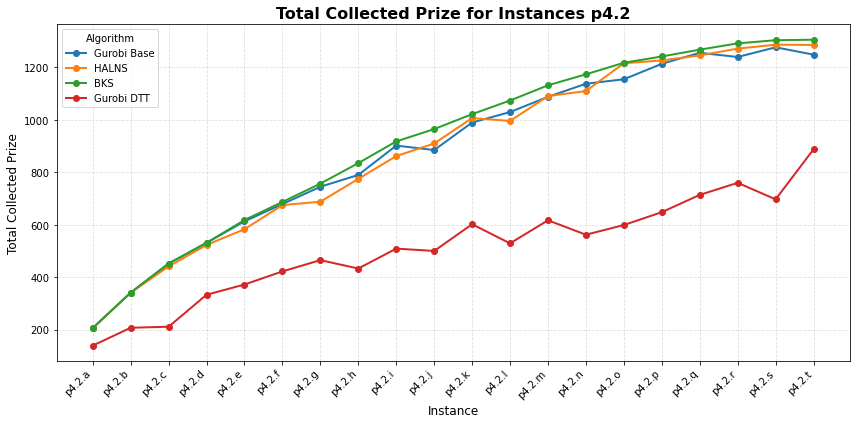

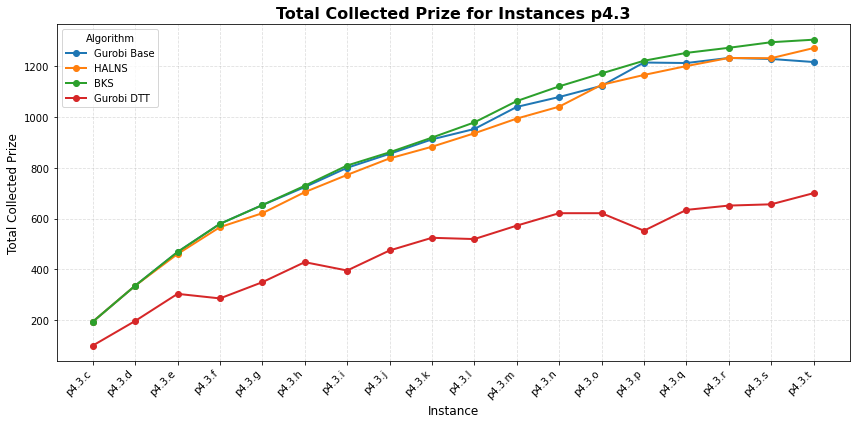

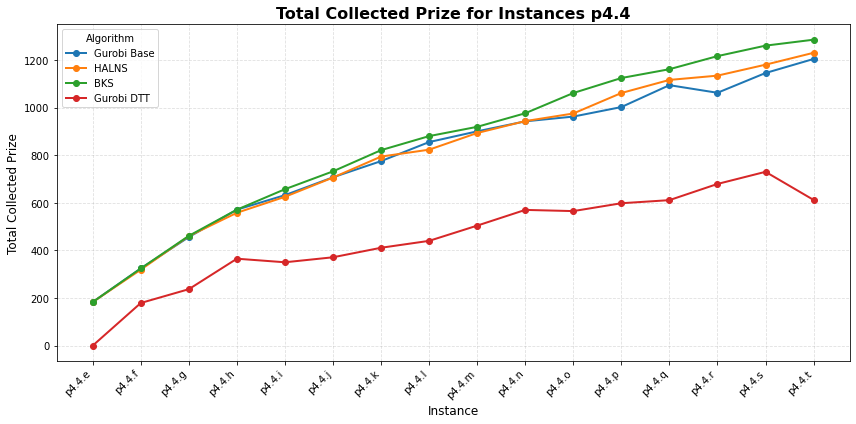

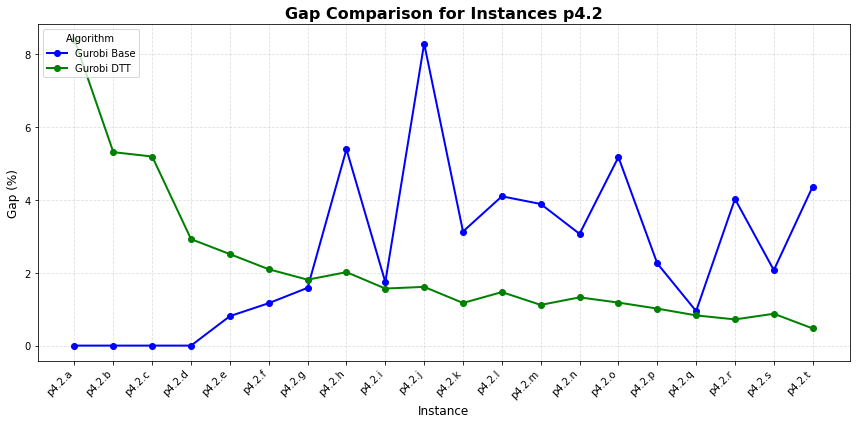

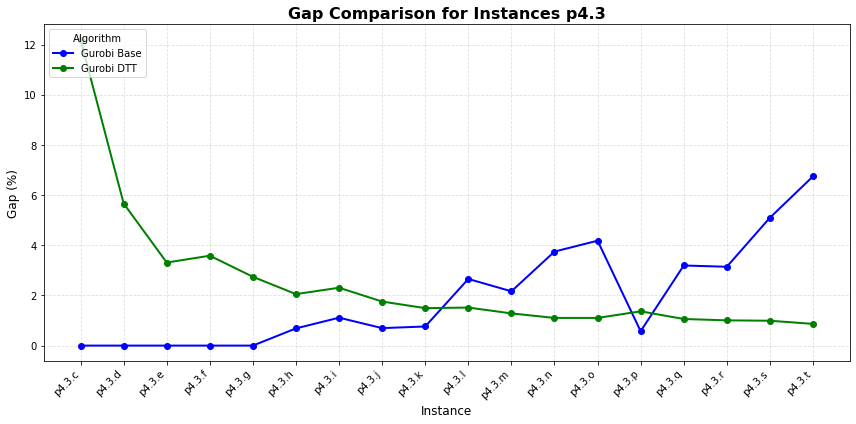

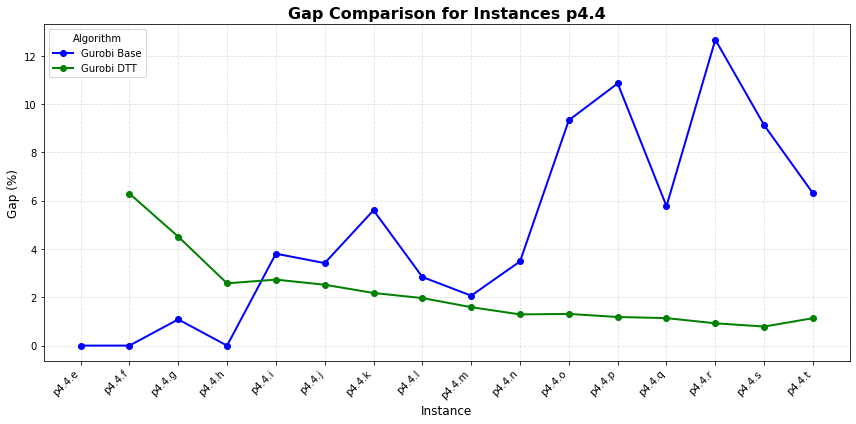

In [84]:
plot_total_prize_combined(df_p42, "Total Collected Prize for Instances p4.2")
plot_total_prize_combined(df_p43, "Total Collected Prize for Instances p4.3")
plot_total_prize_combined(df_p44, "Total Collected Prize for Instances p4.4")

plot_gap_combined(df_p42, "Gap Comparison for Instances p4.2")
plot_gap_combined(df_p43, "Gap Comparison for Instances p4.3")
plot_gap_combined(df_p44, "Gap Comparison for Instances p4.4")
